# To Run:
- Initialize a directory with these scripts, as well as `Attack.py` and its associated depedencies.
- Run the notebook cells corresponding to attack.

In [10]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.1 MB/s eta 0:00:

In [14]:
!python main.py

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified
196
196
100
Dataloaders saved!
==> Building model..

Epoch: 0
 [================================================================>]  Step: 471ms | Tot: 14s27ms | Loss: 2.015 | Acc: 27.996% (6999/25000) 196/196 
 [================================================================>]  Step: 10ms | Tot: 2s879ms | Loss: 1.749 | Acc: 33.870% (3387/10000) 100/100 
Saving..

Epoch: 1
 [================================================================>]  Step: 14ms | Tot: 13s658ms | Loss: 1.606 | Acc: 40.468% (10117/25000) 196/196 
 [================================================================>]  Step: 11ms | Tot: 4s3ms | Loss: 1.514 | Acc: 44.510% (4451/10000) 100/100 
Saving..

Epoch: 2
 [================================================================>]  Step: 16ms | Tot: 12s653ms | Loss: 1.442 | Acc: 47.056% (11764/25000) 196/196 
 [===============================================================

In [ ]:
"""
Saved Checkpoint
Epoch: 63
 [================================================================>]  Step: 13ms | Tot: 13s550ms | Loss: 0.241 | Acc: 91.680% (22920/25000) 196/196 
 [================================================================>]  Step: 29ms | Tot: 2s926ms | Loss: 0.526 | Acc: 83.770% (8377/10000) 100/100 
Saving..
"""

In [64]:
from MoPe_CIFAR import MoPe

In [81]:
from LOSS import LOSS

In [65]:
MoPer = MoPe("cifar-resnet-18")

In [66]:
from torch.utils.data import DataLoader, SequentialSampler


import torch
traindata = torch.load("trainloader.pth").dataset
valdata = torch.load("valloader.pth").dataset

sampler = SequentialSampler(traindata)
valsampler = SequentialSampler(valdata)

training_dataloader = DataLoader(traindata, batch_size=1, sampler=sampler)
validation_dataloader = DataLoader(valdata, batch_size=1, sampler=valsampler)



# 0.005 noise configuration

In [71]:

n_models = 2
sigma = 0.005
n_samples = 3000
device = "cuda"
criterion = torch.nn.CrossEntropyLoss()

In [72]:
config_mope = {
    "training_dl": training_dataloader,
    "validation_dl": validation_dataloader,
    "n_new_models": n_models,
    "noise_stdev": sigma,
    "bs" : 1,
    "nbatches": n_samples,
    "samplelength": None,
    "device": device,
    "criterion": criterion
}

# MoPe on fully-trained model

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:08<01:16, 295.35it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:10<01:30, 247.65it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:09<01:27, 258.02it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:08<01:19, 284.65it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:08<01:20, 278.94it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:09<01:26, 259.63it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:09<01:22, 271.24it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:08<01:16, 292.88it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:09<01:26, 260.49it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:09<01:26, 259.41it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:08<01:14, 300.73it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:09<01:26, 259.85it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:09<01:27, 257.69it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:08<01:15, 297.93it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:09<01:22, 274.38it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:09<01:26, 259.50it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:08<01:14, 302.19it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:09<01:26, 258.64it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:09<01:27, 256.63it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:08<01:15, 297.41it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:09<01:26, 260.48it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:09<01:28, 255.38it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:08<01:19, 283.04it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:09<01:24, 267.44it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:09<01:27, 256.48it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:09<01:21, 276.58it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:08<01:20, 279.41it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:09<01:27, 257.94it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:09<01:23, 268.09it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:08<01:19, 284.76it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:09<01:27, 256.10it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:09<01:24, 265.28it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:09<01:26, 260.15it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:09<01:28, 253.70it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:08<01:16, 294.34it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:09<01:27, 256.47it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:09<01:27, 257.78it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:08<01:19, 282.64it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:09<01:26, 260.64it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:09<01:28, 255.48it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:08<01:20, 279.71it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:08<01:19, 281.38it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:09<01:27, 258.56it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:09<01:24, 266.19it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:08<01:16, 295.42it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:09<01:26, 260.16it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:09<01:26, 259.32it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:08<01:15, 299.61it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:09<01:26, 258.66it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:09<01:22, 274.06it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:08<01:17, 289.70it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:09<01:27, 258.10it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:09<01:25, 264.17it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:08<01:14, 300.92it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:09<01:26, 259.04it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:09<01:26, 260.32it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:08<01:14, 301.55it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:09<01:26, 261.53it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:09<01:25, 261.68it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:08<01:18, 287.04it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:08<01:18, 285.19it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:09<01:26, 258.81it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:09<01:23, 270.90it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:08<01:14, 302.20it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:09<01:27, 256.55it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:08<01:16, 293.97it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:09<01:24, 267.80it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:09<01:28, 255.51it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:08<01:18, 285.40it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:09<01:21, 275.70it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:09<01:27, 257.96it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:09<01:22, 272.98it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:08<01:18, 287.89it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:09<01:28, 255.59it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:09<01:26, 261.42it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:08<01:16, 295.96it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:09<01:27, 257.59it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:09<01:27, 257.87it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:08<01:15, 299.93it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:09<01:28, 254.97it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:09<01:21, 275.42it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:08<01:20, 279.13it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:09<01:27, 258.41it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:09<01:22, 272.33it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:08<01:16, 295.31it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:09<01:26, 260.81it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:09<01:26, 260.22it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:08<01:14, 301.08it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:09<01:26, 259.06it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:09<01:27, 256.32it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:08<01:15, 298.70it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:09<01:22, 271.93it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:09<01:26, 260.56it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:09<01:22, 274.15it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:08<01:17, 290.60it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:09<01:27, 257.46it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:08<01:14, 302.10it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:09<01:27, 256.59it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:09<01:26, 261.12it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:08<01:19, 282.21it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:09<01:22, 273.46it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:09<01:26, 260.65it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:09<01:22, 273.07it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:08<01:17, 291.18it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:09<01:27, 256.52it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:09<01:26, 261.34it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:08<01:14, 300.96it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:09<01:26, 259.79it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:09<01:27, 257.57it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:08<01:15, 299.50it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:09<01:25, 263.64it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:09<01:27, 256.89it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:08<01:16, 293.44it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:09<01:27, 256.10it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:09<01:26, 259.03it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:08<01:15, 297.52it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:09<01:27, 257.66it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:09<01:26, 259.08it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:08<01:15, 296.13it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:09<01:21, 275.14it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:09<01:26, 258.97it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:09<01:22, 271.60it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:08<01:17, 290.07it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:09<01:27, 258.19it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:09<01:25, 261.87it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:08<01:14, 301.60it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:09<01:26, 259.73it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:09<01:27, 257.68it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:08<01:17, 288.67it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:09<01:27, 257.05it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:09<01:25, 262.57it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:08<01:15, 297.72it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:09<01:27, 257.49it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:09<01:26, 259.14it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:08<01:15, 299.42it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:09<01:26, 260.10it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:09<01:27, 256.04it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:08<01:15, 297.86it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:09<01:21, 276.05it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:09<01:27, 255.88it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:09<01:24, 266.28it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:08<01:18, 286.05it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:09<01:28, 255.31it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:09<01:24, 267.38it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

Loading Perturbed Model 1/15
Loading Perturbed Model 2/15
Loading Perturbed Model 3/15
Loading Perturbed Model 4/15
Loading Perturbed Model 5/15
Loading Perturbed Model 6/15
Loading Perturbed Model 7/15
Loading Perturbed Model 8/15
Loading Perturbed Model 9/15
Loading Perturbed Model 10/15
Loading Perturbed Model 11/15
Loading Perturbed Model 12/15
Loading Perturbed Model 13/15
Loading Perturbed Model 14/15
Loading Perturbed Model 15/15
Evaluating Base Model


 10%|█         | 2500/25000 [00:09<01:26, 259.60it/s]


Evaluating Perturbed Model 1/15


 10%|█         | 2500/25000 [00:09<01:27, 256.84it/s]


Evaluating Perturbed Model 2/15


 10%|█         | 2500/25000 [00:08<01:18, 286.18it/s]


Evaluating Perturbed Model 3/15


 10%|█         | 2500/25000 [00:09<01:26, 259.49it/s]


Evaluating Perturbed Model 4/15


 10%|█         | 2500/25000 [00:09<01:28, 253.69it/s]


Evaluating Perturbed Model 5/15


 10%|█         | 2500/25000 [00:08<01:19, 282.72it/s]


Evaluating Perturbed Model 6/15


 10%|█         | 2500/25000 [00:09<01:24, 267.77it/s]


Evaluating Perturbed Model 7/15


 10%|█         | 2500/25000 [00:09<01:27, 255.84it/s]


Evaluating Perturbed Model 8/15


 10%|█         | 2500/25000 [00:09<01:21, 277.43it/s]


Evaluating Perturbed Model 9/15


 10%|█         | 2500/25000 [00:09<01:22, 271.14it/s]


Evaluating Perturbed Model 10/15


 10%|█         | 2500/25000 [00:09<01:27, 257.10it/s]


Evaluating Perturbed Model 11/15


 10%|█         | 2500/25000 [00:09<01:22, 271.82it/s]


Evaluating Perturbed Model 12/15


 10%|█         | 2500/25000 [00:08<01:18, 285.56it/s]


Evaluating Perturbed Model 13/15


 10%|█         | 2500/25000 [00:09<01:28, 254.13it/s]


Evaluating Perturbed Model 14/15


 10%|█         | 2500/25000 [00:09<01:26, 259.89it/s]


Evaluating Perturbed Model 15/15


 10%|█         | 2500/25000 [00:08<01:17, 291.08it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

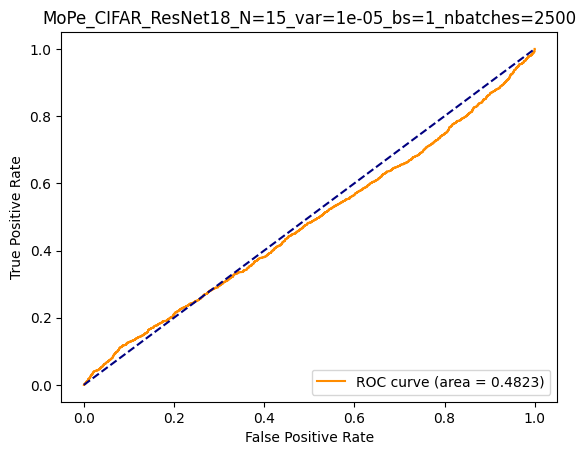

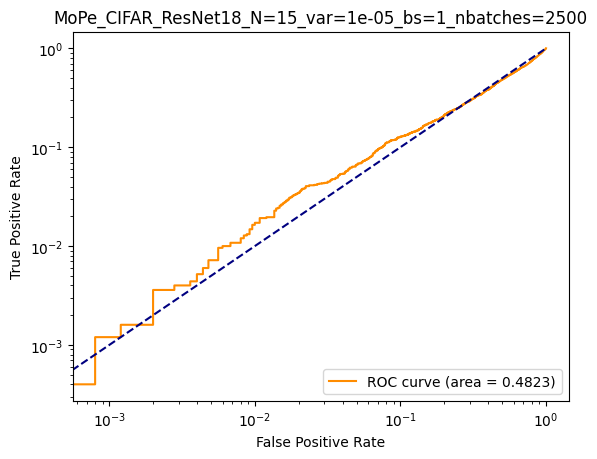

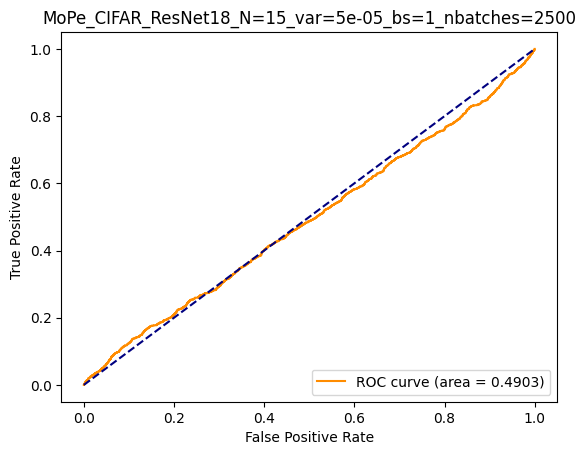

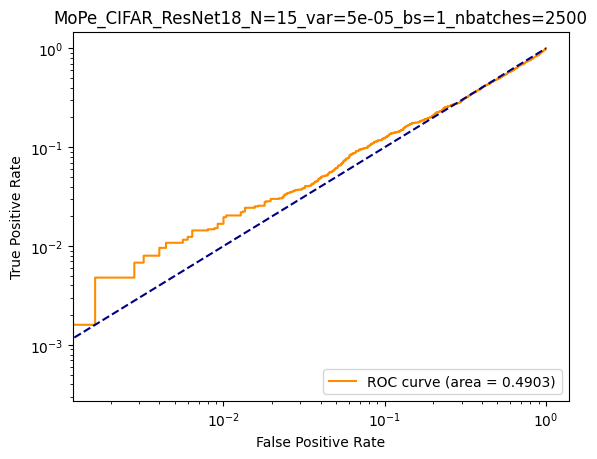

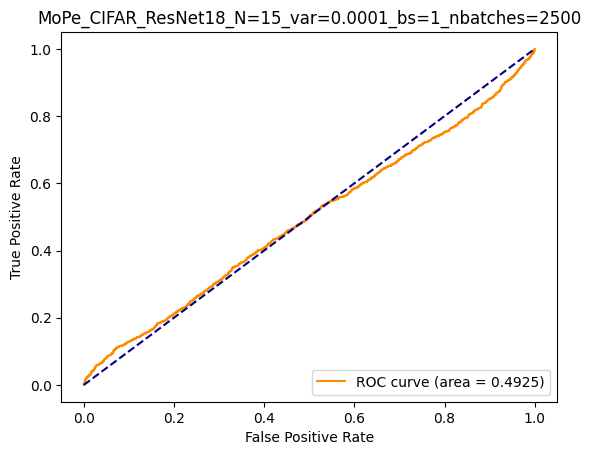

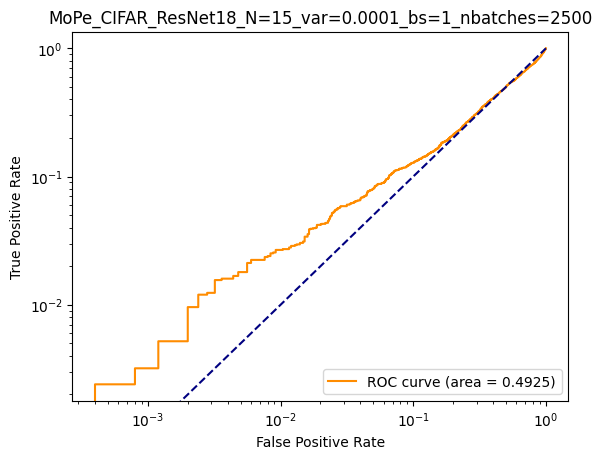

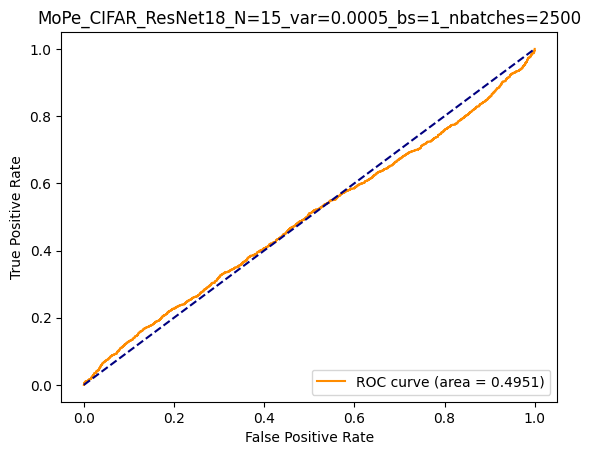

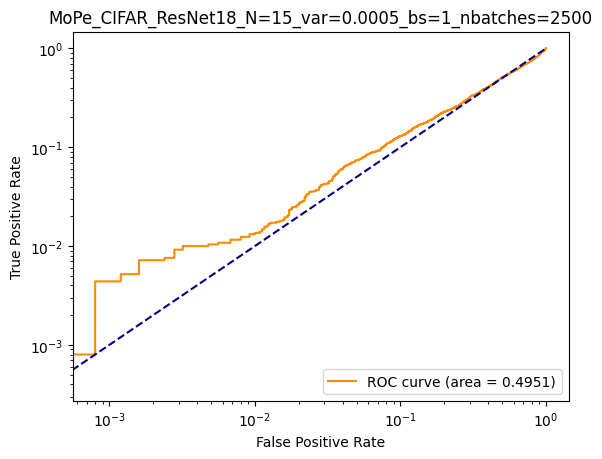

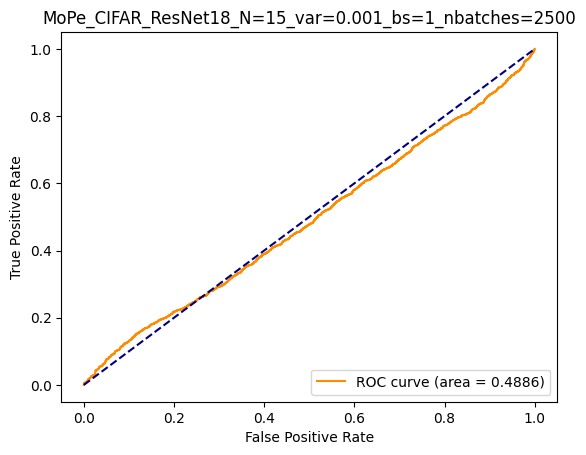

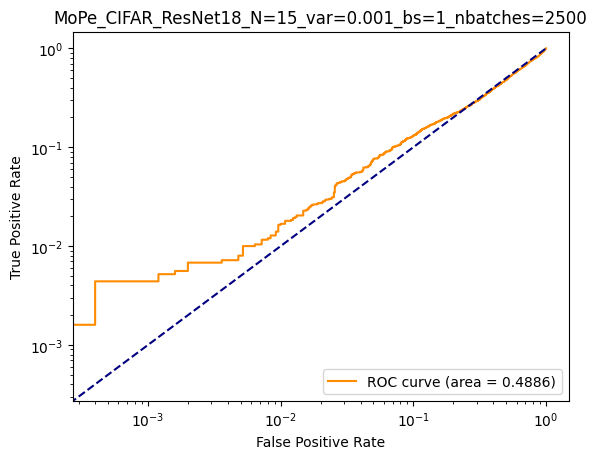

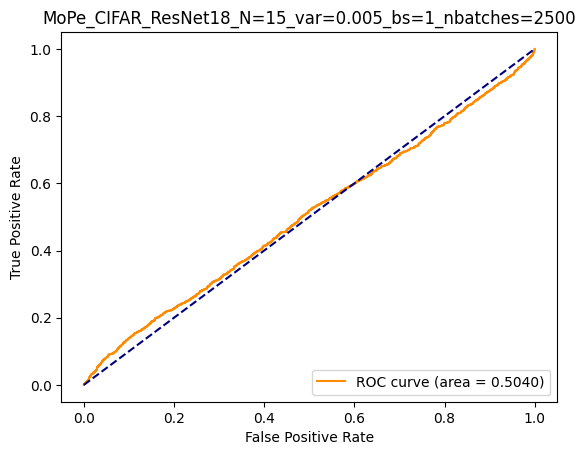

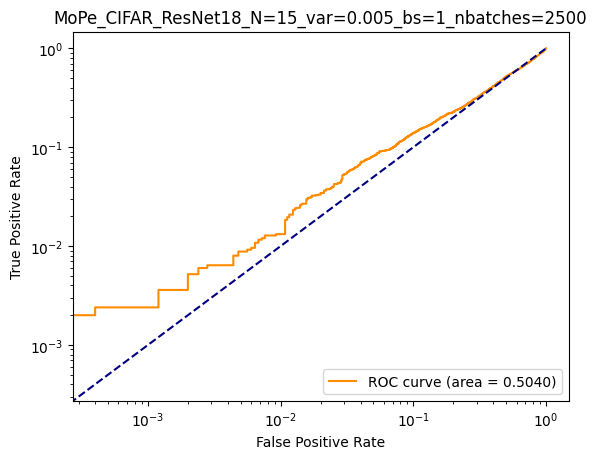

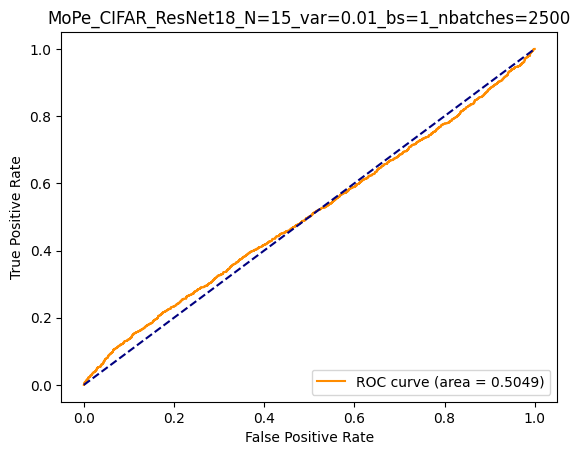

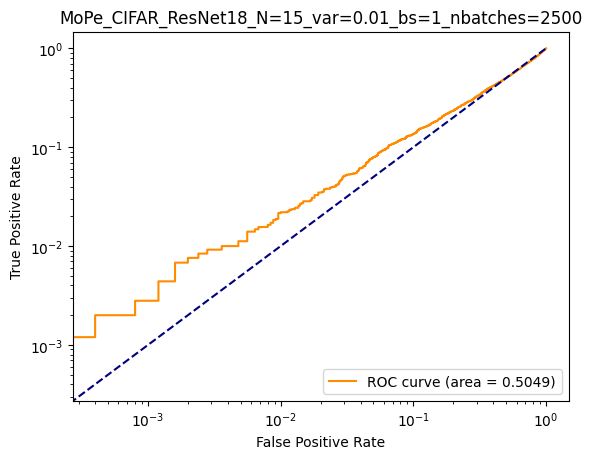

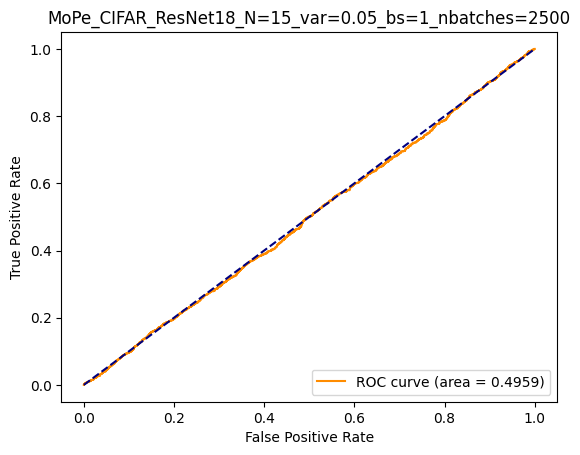

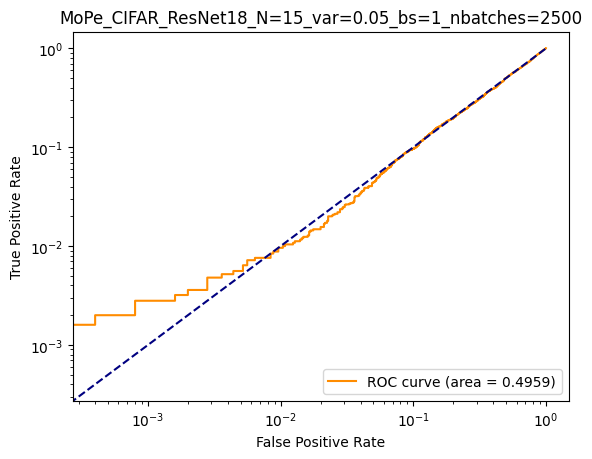

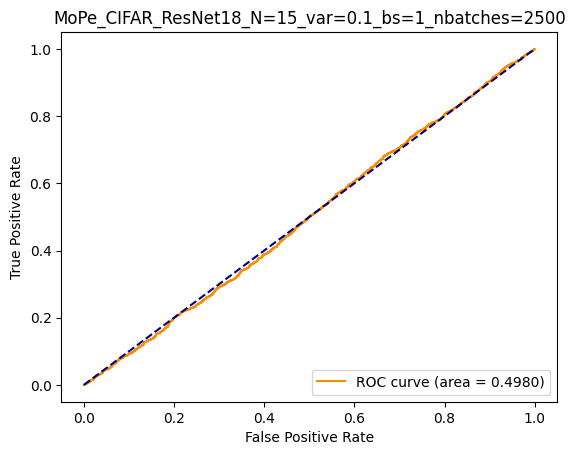

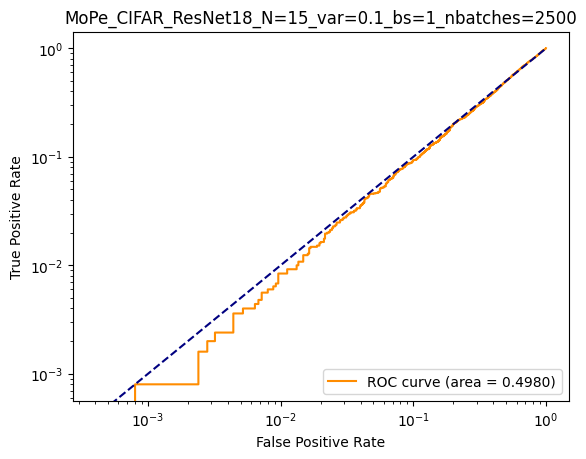

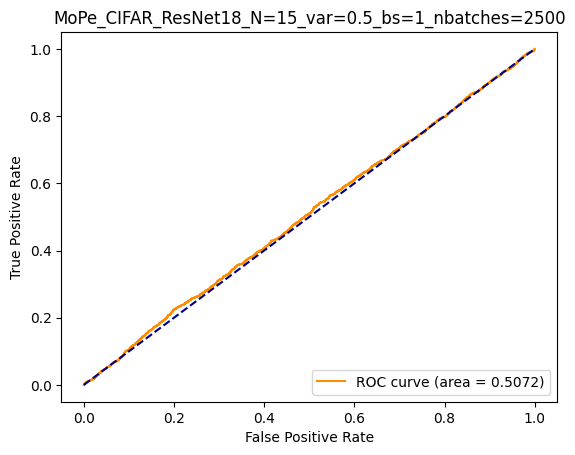

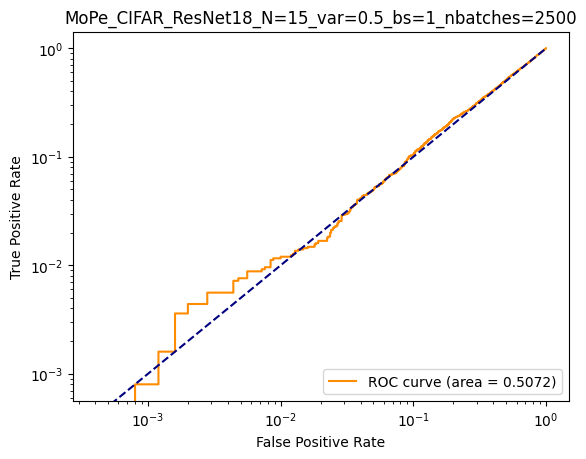

In [77]:
noise_lvls = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2, 5e-2, 1e-1, 5e-1]
for noise in noise_lvls:
  config_mope = {
    "training_dl": training_dataloader,
    "validation_dl": validation_dataloader,
    "n_new_models": 15,
    "noise_stdev": noise,
    "bs" : 1,
    "nbatches": 2500,
    "samplelength": None,
    "device": device,
    "criterion": criterion
  }
  
  MoPer.inference(config_mope)
  MoPer.attack_plot_ROC(log_scale = False, show_plot=False)
  MoPer.attack_plot_ROC(log_scale = True, show_plot=False)
  MoPer.save()

In [73]:
MoPer.inference(config_mope)

Loading Perturbed Model 1/10
Loading Perturbed Model 2/10
Loading Perturbed Model 3/10
Loading Perturbed Model 4/10
Loading Perturbed Model 5/10
Loading Perturbed Model 6/10
Loading Perturbed Model 7/10
Loading Perturbed Model 8/10
Loading Perturbed Model 9/10
Loading Perturbed Model 10/10
Evaluating Base Model


 12%|█▏        | 3000/25000 [00:10<01:19, 275.60it/s]


Evaluating Perturbed Model 1/10


 12%|█▏        | 3000/25000 [00:11<01:23, 263.85it/s]


Evaluating Perturbed Model 2/10


 12%|█▏        | 3000/25000 [00:11<01:27, 251.57it/s]


Evaluating Perturbed Model 3/10


 12%|█▏        | 3000/25000 [00:11<01:23, 264.72it/s]


Evaluating Perturbed Model 4/10


 12%|█▏        | 3000/25000 [00:11<01:24, 261.74it/s]


Evaluating Perturbed Model 5/10


 12%|█▏        | 3000/25000 [00:10<01:19, 276.48it/s]


Evaluating Perturbed Model 6/10


 12%|█▏        | 3000/25000 [00:11<01:23, 262.53it/s]


Evaluating Perturbed Model 7/10


 12%|█▏        | 3000/25000 [00:10<01:16, 289.21it/s]


Evaluating Perturbed Model 8/10


 12%|█▏        | 3000/25000 [00:11<01:23, 264.59it/s]


Evaluating Perturbed Model 9/10


 12%|█▏        | 3000/25000 [00:11<01:21, 271.30it/s]


Evaluating Perturbed Model 10/10


 12%|█▏        | 3000/25000 [00:11<01:23, 264.72it/s]


/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor

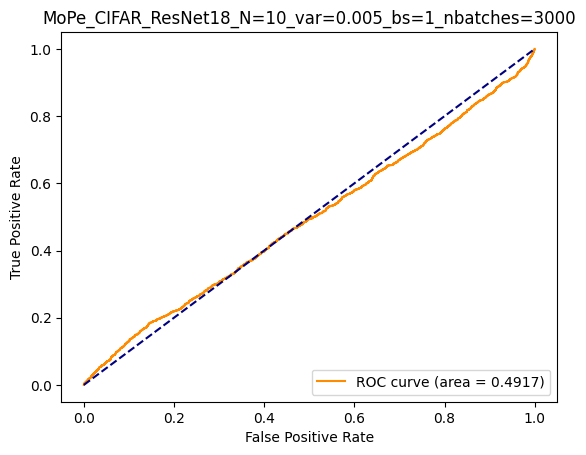

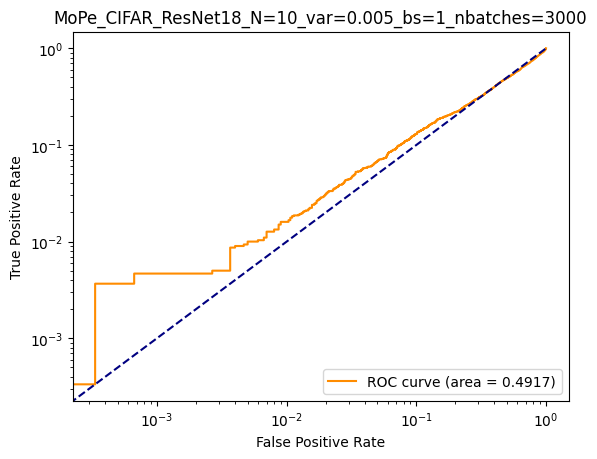

In [74]:
MoPer.attack_plot_ROC(log_scale = False, show_plot=False)
MoPer.attack_plot_ROC(log_scale = True, show_plot=False)
MoPer.save()

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:01<01:22, 295.70it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:02<01:57, 208.46it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:01<01:23, 295.03it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:01<01:23, 294.86it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:01<01:36, 253.58it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:01<01:31, 267.73it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:01<01:22, 297.56it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:01<01:22, 297.63it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:02<02:05, 194.99it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:01<01:22, 295.39it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:01<01:23, 294.91it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:01<01:26, 281.89it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:01<01:21, 300.98it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:01<01:22, 297.93it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:01<01:20, 302.75it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:02<01:56, 210.35it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

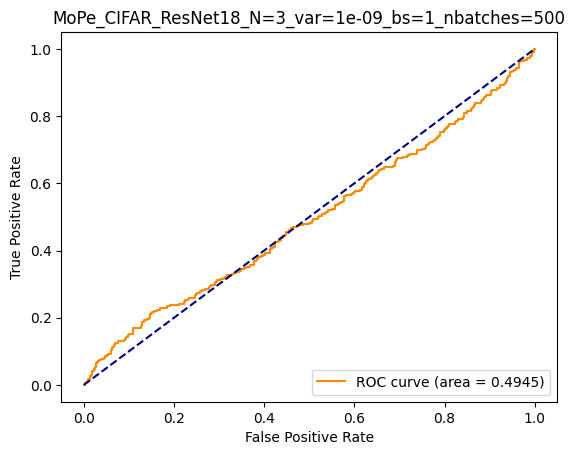

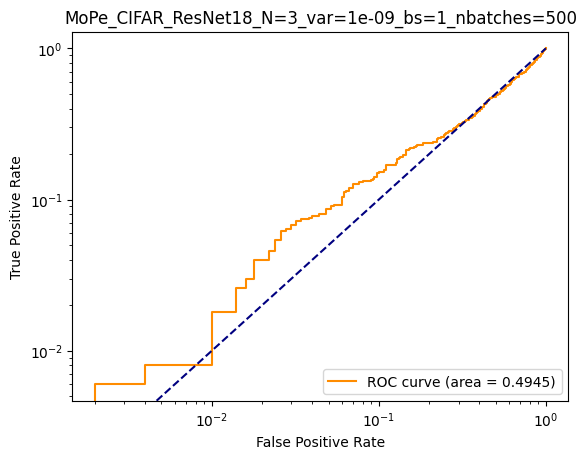

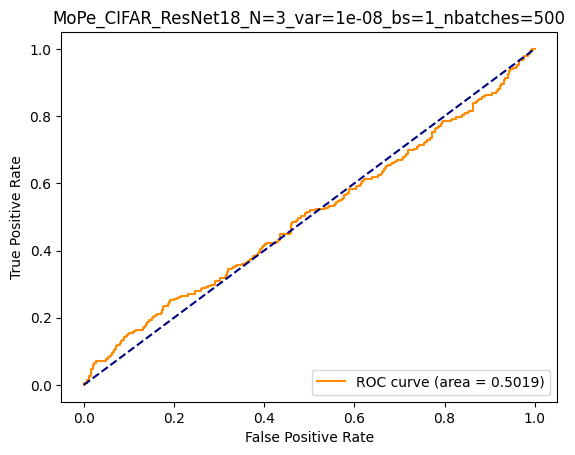

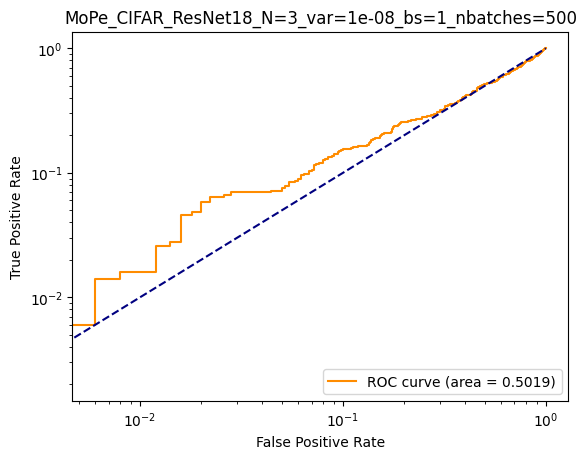

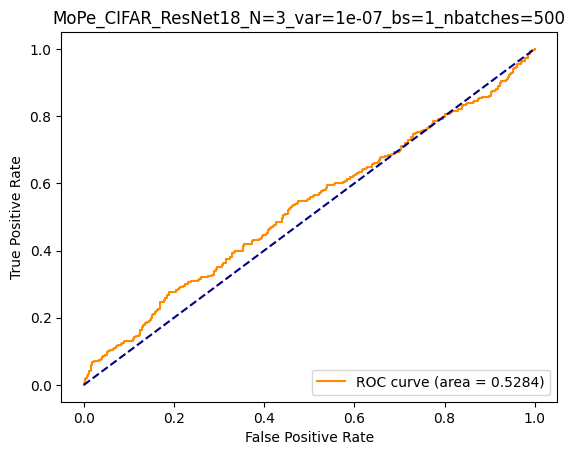

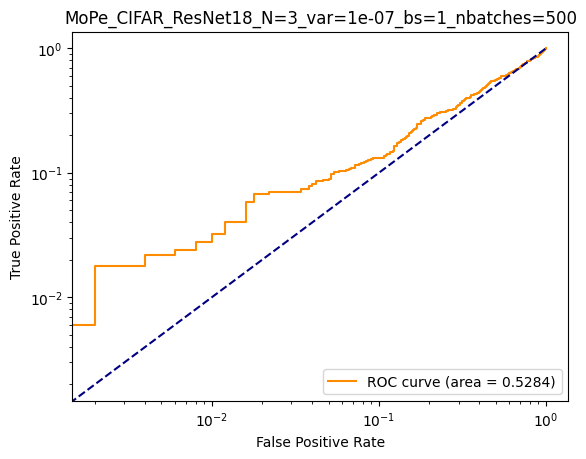

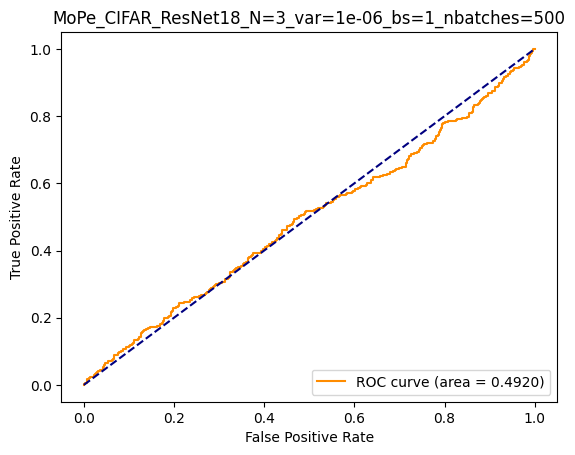

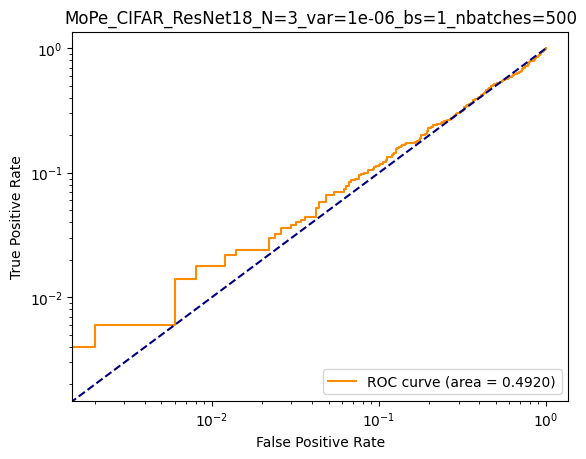

In [78]:
noise_lvls = [1e-9, 1e-8, 1e-7, 1e-6]
for noise in noise_lvls:
  config_mope = {
    "training_dl": training_dataloader,
    "validation_dl": validation_dataloader,
    "n_new_models": 3,
    "noise_stdev": noise,
    "bs" : 1,
    "nbatches": 500,
    "samplelength": None,
    "device": device,
    "criterion": criterion
  }
  
  MoPer.inference(config_mope)
  MoPer.attack_plot_ROC(log_scale = False, show_plot=False)
  MoPer.attack_plot_ROC(log_scale = True, show_plot=False)
  MoPer.save()

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:01<01:21, 300.43it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:01<01:22, 297.56it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:01<01:34, 259.01it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:01<01:33, 262.18it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:01<01:22, 295.83it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:01<01:20, 303.30it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:02<02:05, 195.01it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:01<01:22, 296.72it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:01<01:22, 298.64it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:02<01:47, 227.54it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:01<01:23, 294.45it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:01<01:22, 296.38it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:01<01:24, 289.77it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:02<01:53, 216.30it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:01<01:22, 297.93it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:01<01:22, 295.96it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

Loading Perturbed Model 1/3
Loading Perturbed Model 2/3
Loading Perturbed Model 3/3
Evaluating Base Model


  2%|▏         | 500/25000 [00:02<01:57, 207.86it/s]


Evaluating Perturbed Model 1/3


  2%|▏         | 500/25000 [00:01<01:22, 297.51it/s]


Evaluating Perturbed Model 2/3


  2%|▏         | 500/25000 [00:01<01:22, 296.96it/s]


Evaluating Perturbed Model 3/3


  2%|▏         | 500/25000 [00:01<01:21, 299.48it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended

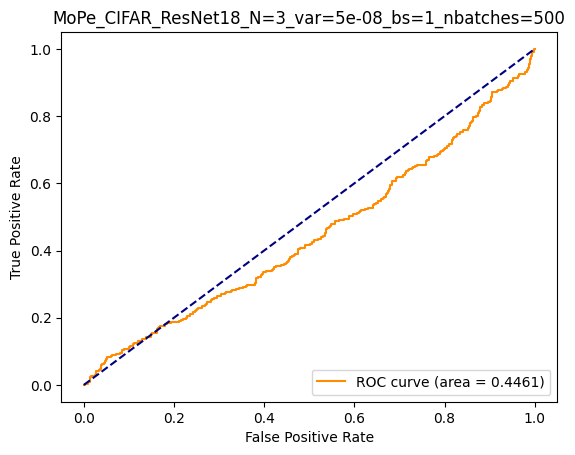

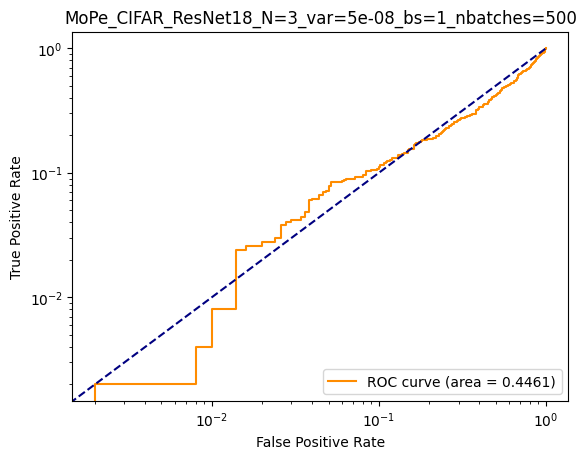

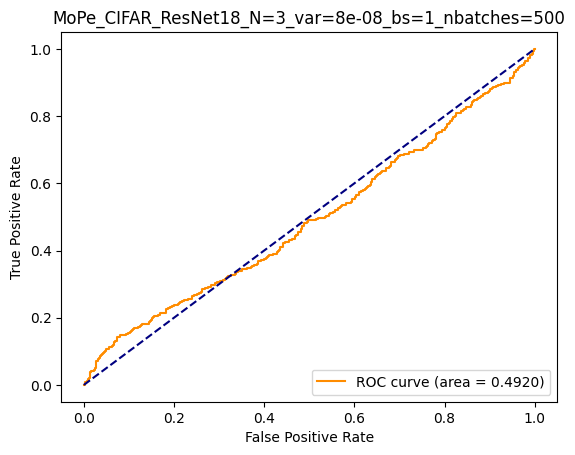

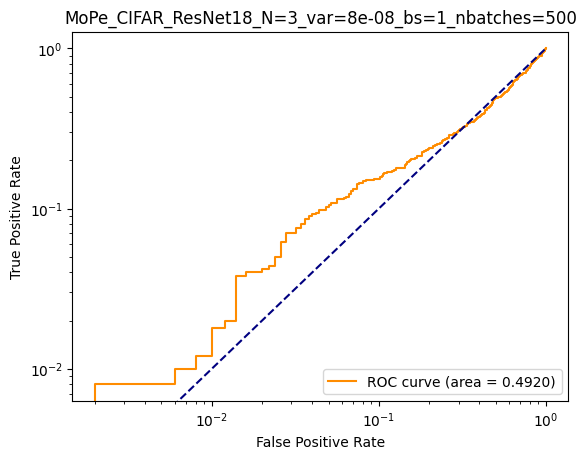

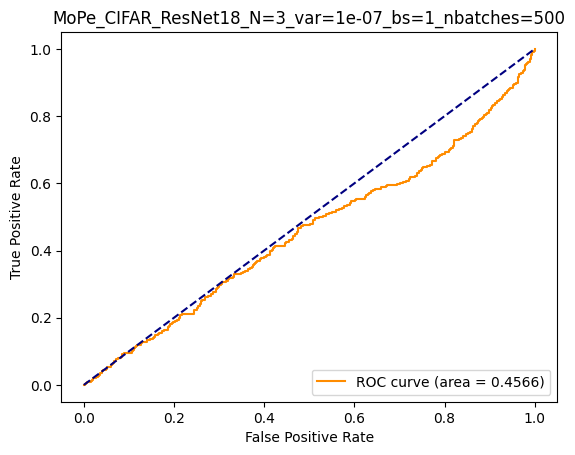

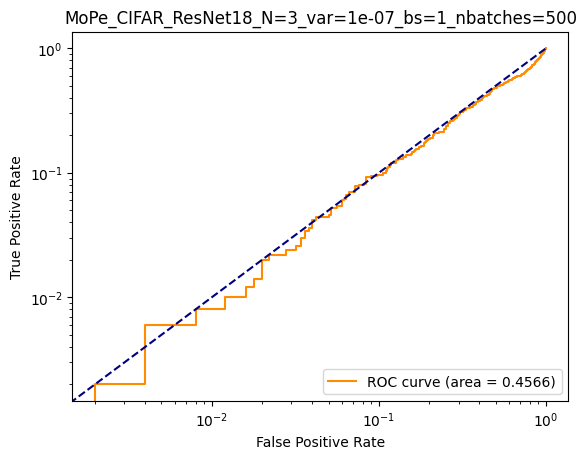

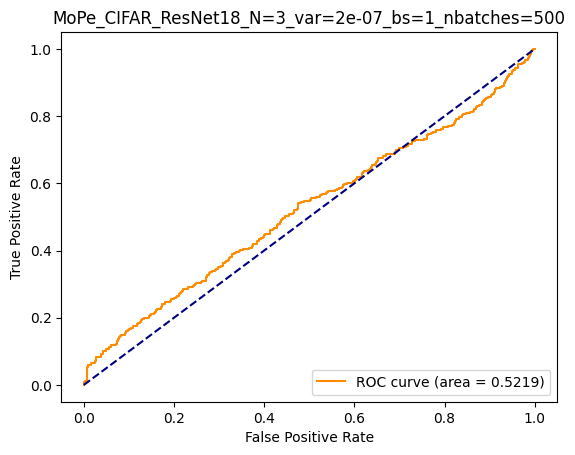

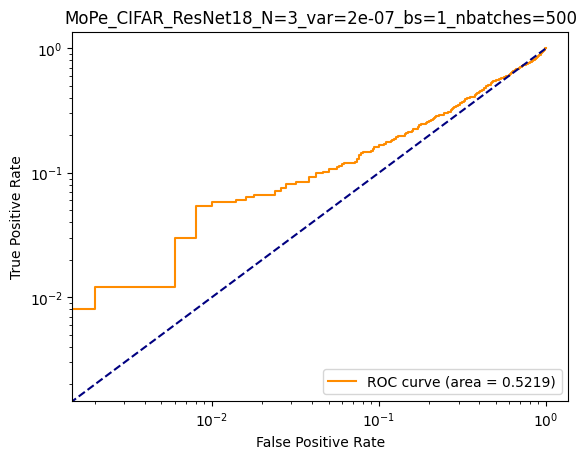

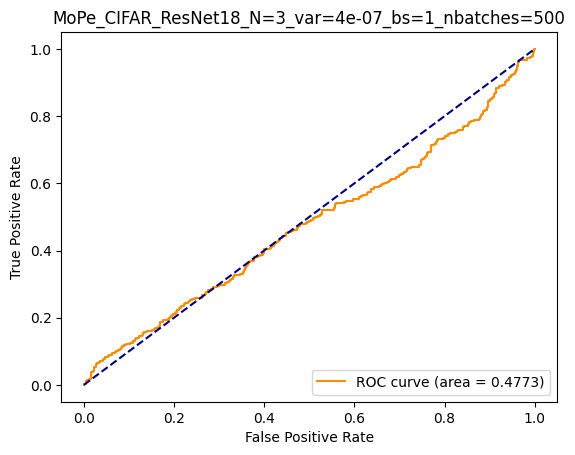

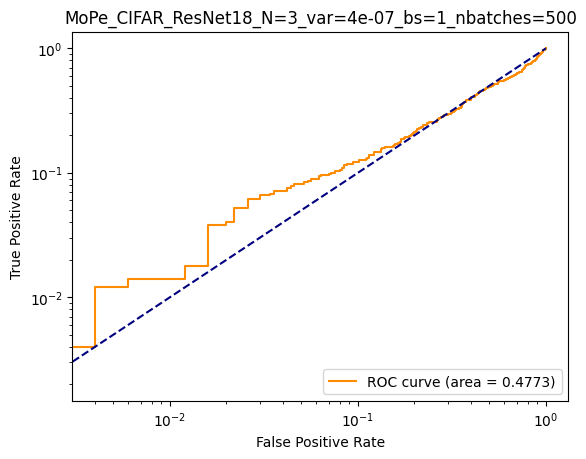

In [79]:
noise_lvls = [5e-8, 8e-8, 1e-7, 2e-7, 4e-7]
for noise in noise_lvls:
  config_mope = {
    "training_dl": training_dataloader,
    "validation_dl": validation_dataloader,
    "n_new_models": 3,
    "noise_stdev": noise,
    "bs" : 1,
    "nbatches": 500,
    "samplelength": None,
    "device": device,
    "criterion": criterion
  }
  
  MoPer.inference(config_mope)
  MoPer.attack_plot_ROC(log_scale = False, show_plot=False)
  MoPer.attack_plot_ROC(log_scale = True, show_plot=False)
  MoPer.save()

# LOSS on Fully-Trained ResNet

In [97]:
from LOSSer import LOSS

In [98]:
LOSSer = LOSS("cifar-resnet-18-loss")

In [101]:
config_loss = {
    "training_dl": training_dataloader,
    "validation_dl": validation_dataloader,
    "bs" : 1,
    "nbatches": 5000,
    "samplelength": None,
    "device": device,
    "criterion": criterion
}

 20%|██        | 5000/25000 [00:18<01:15, 266.41it/s]
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_statistic = torch.tensor(val_statistic).flatten()
/content/attack_utils.py:124: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_statistic = torch.tensor(train_statistic).flatten()
/content/attack_utils.py:126: UserWarning: To copy construct from a tensor, it is recommende

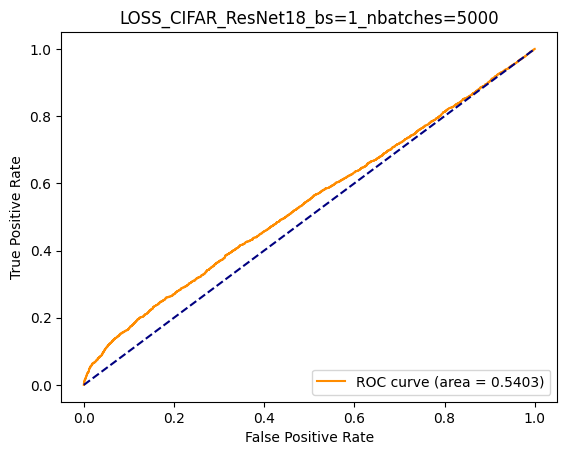

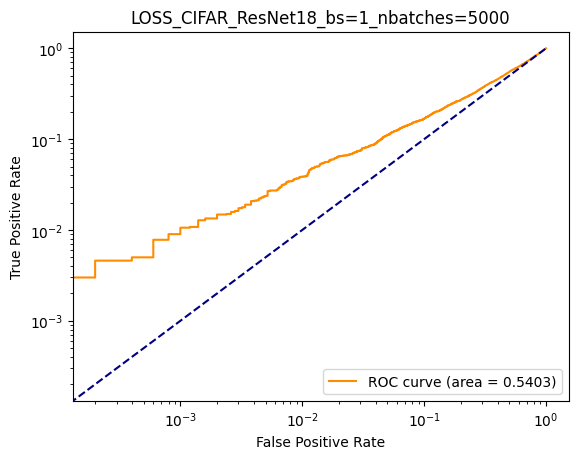

In [102]:

LOSSer.inference(config_loss)

LOSSer.attack_plot_ROC(log_scale = False, show_plot=False)
LOSSer.attack_plot_ROC(log_scale = True, show_plot=False)
LOSSer.save()